In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

# Load data

## Motor Cortex + Striatum (probe 0)

In [27]:
dataset = 'M030_2024_04_11_17_00'
mouse_id = 'M030'
probe = '0'
data_dir = '/data/mouse_data/processed/'+mouse_id+'/'+dataset+'/'+dataset+'_ephys/'+dataset+'_g0/'+dataset+'_g0_imec'+probe+'/sorter_output/'
sys.path.append(data_dir)
import params

In [28]:
#ops = np.load(data_dir+'ops.npy', allow_pickle=True).item()
camps = pd.read_csv(data_dir+'cluster_Amplitude.tsv', sep='\t')['Amplitude'].values
contam_pct = pd.read_csv(data_dir+'cluster_ContamPct.tsv', sep='\t')['ContamPct'].values
chan_map =  np.load(data_dir+'channel_map.npy')
templates =  np.load(data_dir+'templates.npy')
chan_best_0 = (templates**2).sum(axis=1).argmax(axis=-1) 
labels_0 = pd.read_csv(data_dir+'cluster_KSLabel.tsv', sep='\t') # label for each cluster (can be good, or multiunit activity --mua)
#chan_best = chan_map[chan_best]
amplitudes = np.load(data_dir+'amplitudes.npy')
st = np.load(data_dir+'spike_times.npy')# time when spike happened. to transform into seconds 
clu = np.load(data_dir+'spike_clusters.npy') # cluster identity of each spike
firing_rates = np.unique(clu, return_counts=True)[1] * 30000 / st.max()
sys.path.append(data_dir)

sample_rate = params.sample_rate
#dshift = ops['dshift']


(array([599.,  29.,  14.,   7.,   1.,   4.,   0.,   0.,   1.,   1.]),
 array([1.13462052e-02, 2.30415426e+00, 4.59696231e+00, 6.88977036e+00,
        9.18257841e+00, 1.14753865e+01, 1.37681945e+01, 1.60610026e+01,
        1.83538106e+01, 2.06466187e+01, 2.29394267e+01]),
 <BarContainer object of 10 artists>)

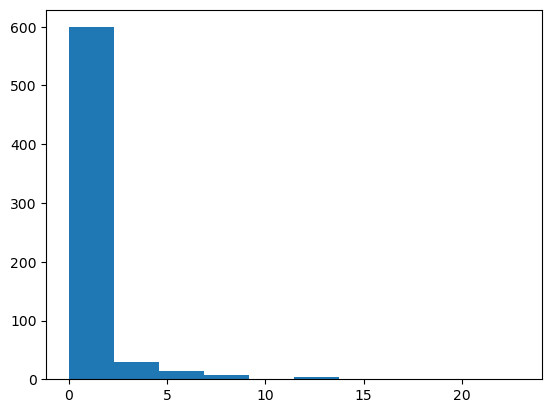

In [29]:
plt.hist(firing_rates)

In [84]:
# transform spike times to miliseconds

st_milsec = st/sample_rate*1000
bin_size = 10 #in milliseconds
start_time = 0

#binned_spikes = bin_spikes(st_milsec, clu, bin_size, start_time=start_time, end_time=None)

In [67]:
good_neurons = labels_0[labels_0['KSLabel']=='good']['cluster_id'].values

In [26]:
len(labels_0[labels_0['KSLabel']=='good'])

150

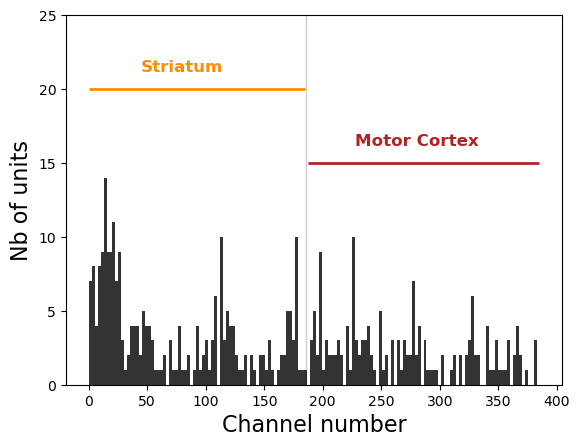

In [72]:
plt.hist(chan_best_0[good_neurons], bins=150,color='black', alpha=0.8)
plt.xlabel('Channel number', fontsize = 16)
plt.ylabel('Nb of units', fontsize = 16)

break_rec_0 = 186 # channel separating striatum from cortex 
h_str = 20
h_m1 = 15

plt.hlines(y=h_str, xmin=0, xmax=break_rec_0-1, linewidth=2,color='darkorange')
plt.hlines(y=h_m1, xmin=break_rec_0+1, xmax=385, linewidth=2, color='firebrick')
plt.vlines(x=break_rec_0, ymin=0, ymax=30, linewidth=1, alpha=0.2, color='black')
plt.text(80, h_str+1, 'Striatum', ha='center', va='bottom', color='darkorange',fontsize=12, weight='bold')
plt.text(280, h_m1+1, 'Motor Cortex', ha='center', va='bottom', color='firebrick',fontsize=12,weight='bold')

plt.ylim(0,25)

plt.savefig('probe_analysis/'+mouse_id+'/'+dataset+'/probe'+probe+'_channel_histogram.pdf')

### Select neurons in different regions

In [73]:
neurons_str_0 = (chan_best_0<break_rec_0) & ((labels_0['KSLabel']=='good').values)
neurons_s1 = (chan_best_0>=break_rec_0) & ((labels_0['KSLabel']=='good').values)

## Somatosensory cortex + Striatum (probe 1) 

In [74]:
probe = '1'
data_dir = '/data/mouse_data/processed/'+mouse_id+'/'+dataset+'/'+dataset+'_ephys/'+dataset+'_g0/'+dataset+'_g0_imec'+probe+'/sorter_output/'
sys.path.append(data_dir)
import params

In [75]:
#ops = np.load(data_dir+'ops.npy', allow_pickle=True).item()
camps = pd.read_csv(data_dir+'cluster_Amplitude.tsv', sep='\t')['Amplitude'].values
contam_pct = pd.read_csv(data_dir+'cluster_ContamPct.tsv', sep='\t')['ContamPct'].values
chan_map =  np.load(data_dir+'channel_map.npy')
templates =  np.load(data_dir+'templates.npy')
chan_best_1 = (templates**2).sum(axis=1).argmax(axis=-1) 
labels_1 = pd.read_csv(data_dir+'cluster_KSLabel.tsv', sep='\t') # label for each cluster (can be good, or multiunit activity --mua)
#chan_best = chan_map[chan_best]
amplitudes = np.load(data_dir+'amplitudes.npy')
st = np.load(data_dir+'spike_times.npy')# time when spike happened. to transform into seconds 
clu = np.load(data_dir+'spike_clusters.npy') # cluster identity of each spike
firing_rates = np.unique(clu, return_counts=True)[1] * 30000 / st.max()
sys.path.append(data_dir)

sample_rate = params.sample_rate
#dshift = ops['dshift']


In [76]:
# transform spike times to miliseconds

st_milsec = st/sample_rate*1000
bin_size = 10 #in milliseconds
start_time = 0

#binned_spikes = bin_spikes(st_milsec, clu, bin_size, start_time=start_time, end_time=None)

In [77]:
good_neurons = labels_1[labels_1['KSLabel']=='good']['cluster_id'].values

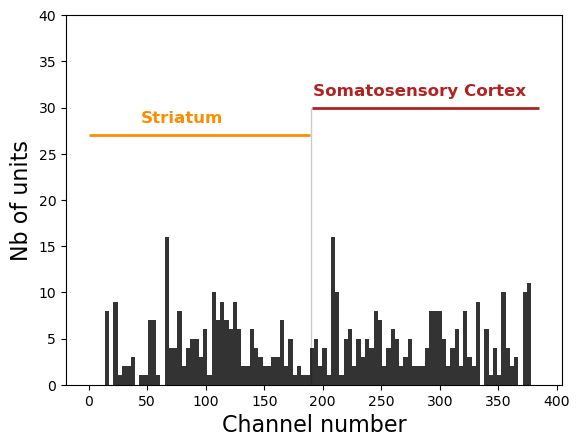

In [78]:
plt.hist(chan_best_1[good_neurons], bins=100,color='black', alpha=0.8)
plt.xlabel('Channel number', fontsize = 16)
plt.ylabel('Nb of units', fontsize = 16)

break_rec_1 = 190 # channel separating striatum from cortex
h_str =  27
h_s1 = 30 
plt.hlines(y=h_str, xmin=0, xmax=break_rec_1-1, linewidth=2,color='darkorange')
plt.hlines(y=h_s1, xmin=break_rec_1+1, xmax=385, linewidth=2, color='firebrick')
plt.vlines(x=break_rec_1, ymin=0, ymax=30, linewidth=1, alpha=0.2, color='black')
plt.text(80, h_str+1, 'Striatum', ha='center', va='bottom', color='darkorange',fontsize=12, weight='bold')
plt.text(283, h_s1+1, 'Somatosensory Cortex', ha='center', va='bottom', color='firebrick',fontsize=12,weight='bold')

plt.ylim(0,40)

plt.savefig('probe_analysis/'+mouse_id+'/'+dataset+'/probe'+probe+'_channel_histogram.pdf')

### Select good neurons for different regions 

In [17]:
neurons_str_1 = (chan_best_1<break_rec_1) & ((labels_1['KSLabel']=='good').values)
neurons_s1 = (chan_best_1>=break_rec_1) & ((labels_1['KSLabel']=='good').values)

# Load Pose Estimation 

In [33]:
dir_to_key_points = '/data/mouse_data/processed/'+mouse_id+'/'+dataset+'/'+dataset+'_pose_estimation/'
df_pose = pd.read_csv(dir_to_key_points + dataset+'_3dpts_angles.csv')

In [72]:
list_of_angles = [col for col in df_pose.columns if 'angle' in col]


# Load Event data

In [55]:
dir_to_behav = '/data/mouse_data/processed/'+mouse_id+'/'+dataset+'/'+dataset+'_behav/'

In [56]:
df_behav = pd.read_csv(dir_to_behav + dataset+'_events.csv')

In [57]:
df_behav[df_behav['type']=='print'].head()

,Unnamed: 0,type,name,time,duration,value
6,6,print,before_camera_trigger,4.0,NaN,3
378,378,print,Sol_direction,305013.0,NaN,5
384,384,print,Sol_direction,310707.0,NaN,4
391,391,print,Sol_direction,316673.0,NaN,2
395,395,print,Sol_direction,324527.0,NaN,5


In [58]:
np.unique(df_behav['name'].values)

array(['Experiment name ', 'Setup ID', 'Sol_direction', 'Start date',
       'Subject ID', 'Task file hash', 'Task name',
       'before_camera_trigger', 'motion', 'quiet_period_end',
       'quiet_period_start', 'session_end', 'session_middle',
       'session_start', 'session_timer', 'trial_off', 'trial_on'],
      dtype=object)

In [73]:
df_behav[df_behav['name']=='Sol_direction'].time.values

array([ 305013.,  310707.,  316673.,  324527.,  333237.,  343157.,
        347777.,  355703.,  359447.,  362797.,  367737.,  379415.,
        384225.,  396177.,  407536.,  408803.,  419483.,  431573.,
        443447.,  453193.,  454637.,  463637.,  467807.,  477745.,
        482987.,  485247.,  496366.,  504816.,  515435.,  522593.,
        532127.,  536934.,  547934.,  552994.,  557634.,  566287.,
        576114.,  582057.,  588044.,  598487.,  605285.,  616044.,
        628097.,  640327.,  643003.,  650185.,  655357.,  661777.,
        667046.,  672577.,  676957.,  679386.,  687425.,  696956.,
        707685.,  712896.,  720327.,  722283.,  728313.,  733027.,
        742003.,  751137.,  752997.,  759935.,  763854.,  773144.,
        784307.,  794635.,  804117.,  810667.,  814654.,  818177.,
        821037.,  825673.,  835067.,  843315.,  846963.,  856417.,
        859527.,  866683.,  870767.,  874397.,  884627.,  897203.,
        908644.,  914437.,  924074.,  930543.,  939513.,  9464

In [65]:
# Subtract before camera trigger so that time 0 equals the first camera trigger :) 

df_behav['time_shifted'] = df_behav['time'] - df_behav[df_behav['name']=='before_camera_trigger'].time.values

In [68]:
df_behav

,Unnamed: 0,type,name,time,duration,value,time_shifted
0,0,info,Experiment name,NaN,NaN,run_task,NaN
1,1,info,Task name,NaN,NaN,earthquake-long,NaN
2,2,info,Task file hash,NaN,NaN,397468066,NaN
3,3,info,Setup ID,NaN,NaN,COM9,NaN
4,4,info,Subject ID,NaN,NaN,M030_2024_04_12_09_40,NaN
...,...,...,...,...,...,...,...
7178,7178,event,motion,3597738.0,NaN,NaN,3597734.0
7179,7179,event,motion,3598418.0,NaN,NaN,3598414.0
7180,7180,event,motion,3599058.0,NaN,NaN,3599054.0
7181,7181,event,motion,3599818.0,NaN,NaN,3599814.0


In [74]:
bin_size = 10 # 10 ms bins

window_size = 1000 # 1 second before and after event

bins_before_after = window_size // bin_size

In [ ]:
# Create an empty DataFrame to store the trials
trials = []

for event_time in df_behav[df_behav['name']=='Sol_direction'].time.values:
    event_bin = event_time // bin_size  # Convert event time to bin index
    start_bin = event_bin - bins_before_after
    end_bin = event_bin + bins_before_after + 1  # Include the event bin
    
    # Ensure the indices are within bounds
    if start_bin >= 0 and end_bin <= m1_spikes.shape[0]:
        trial_data = m1_spikes[start_bin:end_bin]
        trials.append(trial_data.flatten())

# Create a DataFrame where each row is a trial
df_trials = pd.DataFrame(trials, index=sol_direction)

# Display the DataFrame
df_trials